In [1]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [2]:
all_df = pd.read_csv("weather.csv")

In [3]:
all_df=all_df.drop(['RISK_MM'], axis=1)

In [4]:
X=all_df.drop(['RainTomorrow'], axis=1).values.astype('float64')

In [5]:
Y = all_df['RainTomorrow'].values.astype('int64')

In [6]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

95672

In [7]:
test_Features[:2]

array([[-0.28057235, -0.88540995, -0.15604664,  0.58549966,  0.29969181,
         0.56686938,  0.71671696,  0.24811193, -0.16280797,  0.27738035,
        -0.47846775, -0.9189042 , -0.53271769],
       [ 0.74023477, -0.34150784, -0.274179  ,  0.43712836,  1.89126836,
         1.3737581 , -0.06742478,  1.02136889, -0.43047181, -0.40644069,
         0.40533611, -0.21640785, -0.53271769]])

In [8]:
train_Label[:4]

array([1, 1, 0, 1])

In [9]:
train_Features.shape

(95672, 13)

In [10]:
test_Label[:4]

array([1, 0, 0, 0])

In [11]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [12]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

Using TensorFlow backend.


In [14]:
model = Sequential()

In [15]:
model.add(Conv1D(filters=13*9,
                 kernel_size=1,
                 padding='valid',  
                 input_shape=(13,1),
                 activation='relu'))

In [16]:
model.add(MaxPooling1D(pool_size=1))

In [17]:
model.add(Conv1D(filters=13*8,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [18]:
model.add(MaxPooling1D(pool_size=1))

In [19]:
model.add(Conv1D(filters=13*7,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [20]:
model.add(MaxPooling1D(pool_size=1))

In [21]:
model.add(Conv1D(filters=13*6,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [22]:
model.add(MaxPooling1D(pool_size=1))

In [23]:
model.add(Conv1D(filters=13*5,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [24]:
model.add(MaxPooling1D(pool_size=1))

In [25]:
model.add(Conv1D(filters=13*4,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [26]:
model.add(MaxPooling1D(pool_size=1))

In [27]:
model.add(Conv1D(filters=13*3,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [28]:
model.add(MaxPooling1D(pool_size=1))

In [29]:
model.add(Conv1D(filters=13*2,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [30]:
model.add(MaxPooling1D(pool_size=1))

In [31]:
model.add(Conv1D(filters=13,
                 kernel_size=1,
                 padding='valid',  
                 activation='relu'))

In [32]:
model.add(MaxPooling1D(pool_size=1))

In [33]:
model.add(Flatten())

In [34]:
model.add(Dense(13, activation='tanh'))

In [35]:
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 13, 117)           234       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 117)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 104)           12272     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 13, 104)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 13, 91)            9555      
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 13, 91)            0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 13, 78)            7176      
__________

In [37]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [38]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=1500,verbose=1,callbacks=[early_stopping])

Train on 76537 samples, validate on 19135 samples
Epoch 1/30
76537/76537 [==============================] - 65s 844us/step - loss: 0.4756 - acc: 0.7961 - val_loss: 0.3832 - val_acc: 0.8316
Epoch 2/30
76537/76537 [==============================] - 58s 758us/step - loss: 0.3643 - acc: 0.8457 - val_loss: 0.3577 - val_acc: 0.8484
Epoch 3/30
76537/76537 [==============================] - 55s 722us/step - loss: 0.3540 - acc: 0.8507 - val_loss: 0.3624 - val_acc: 0.8428
Epoch 4/30
76537/76537 [==============================] - 57s 748us/step - loss: 0.3512 - acc: 0.8520 - val_loss: 0.3526 - val_acc: 0.8516
Epoch 5/30
76537/76537 [==============================] - 60s 778us/step - loss: 0.3477 - acc: 0.8527 - val_loss: 0.3488 - val_acc: 0.8529
Epoch 6/30
76537/76537 [==============================] - 59s 770us/step - loss: 0.3462 - acc: 0.8534 - val_loss: 0.3511 - val_acc: 0.8509
Epoch 7/30
76537/76537 [==============================] - 75s 983us/step - loss: 0.3461 - acc: 0.8533 - val_loss: 0.

In [39]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

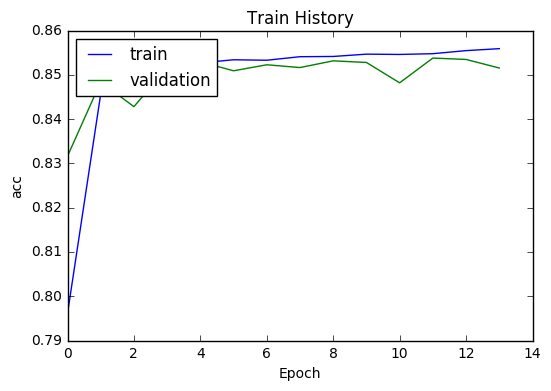

In [40]:
show_train_history(train_history,'acc','val_acc')

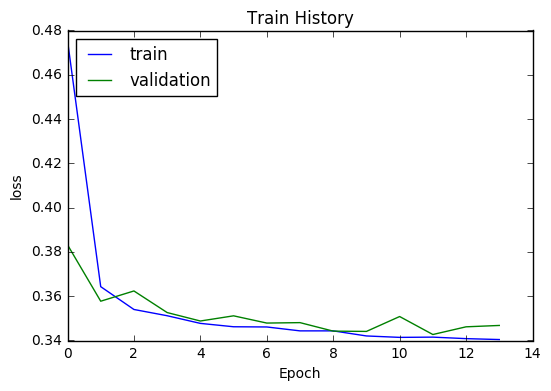

In [41]:
show_train_history(train_history,'loss','val_loss')

In [42]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

23918/23918 [==============================] - 8s 337us/step


In [43]:
scores[1]

0.8503637427878585